<a href="https://colab.research.google.com/github/mattu117117/For-classroom/blob/main/ex2_B231810.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ex2-0 学籍番号、氏名　↓（記入してください）

## ex2-1 課題に取り組む準備
1.   クラスルームから ex2_B123456.ipynb （このファイル）をダウンロードする。
2.   ファイル名を自分の学生番号に変更する。
3.   自分の google drive 上に課題用のォルダを作ってそこにアップする。
4.   データファイル<1-2-2020.xlsx>、<2-2-2020.xlsx>も同じフォルダにアップする。
5.   colab で ex2_B999999.ipynb を開き課題に取り組む。

## ex2-2 データの準備
Lecture2.ipynb のノック28～ノック29 の内容の繰り返しです。ここを実行すると、datas_v_all が完成します。これを使ってグラフの作り方を確認しましょう。

In [23]:
from google.colab import drive
drive.mount('/content/drive')

# OSというライブラリを呼び出し、project 等で指定したフォルダへ移動する。
import os
project = '24StatisticalAnalysisEx.'
os.chdir(f'/content/drive/MyDrive/25StatisticalAnalysisEx./Lecture2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
%%shell
pip install japanize-matplotlib

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib


col_ca_data = pd.read_excel('2-2-2020.xlsx', skiprows=1, header=None)
col_ca_data = col_ca_data.head(3)

col_ca_data.iloc[1,1:].fillna(col_ca_data.iloc[0,1:], inplace=True)
col_ca_data.iloc[1, 1:] = col_ca_data.iloc[1, 1:].str.replace('発電所','')

for i in col_ca_data.columns:
  if i < col_ca_data.columns.max():
    col_ca_data[i + 1].fillna(col_ca_data[i], inplace=True)
col_ca_data.replace('〔バイオマス〕','バイオマス', inplace=True)
col_ca_data.replace('〔廃棄物〕','廃棄物', inplace=True)

cols_ca = []
for i in col_ca_data.columns:
  tg_col = '_'.join(list(col_ca_data[i].dropna()))
  cols_ca.append(tg_col)
cols_ca


xl_ca = pd.ExcelFile('2-2-2020.xlsx')
sheets = xl_ca.sheet_names
ca_datas = []
for sheet in sheets:
  capacity_data = xl_ca.parse(sheet,  skiprows=4, header=None)
  capacity_data = capacity_data.head(47)
  capacity_data.columns = cols_ca
  capacity_data['年月'] = sheet
  ca_datas.append(capacity_data)
ca_datas = pd.concat(ca_datas, ignore_index=True)
ca_datas.head()

# 値の修正
ca_datas['火力発電所_火力_電力量'] = ca_datas['火力発電所_火力_電力量'] - ca_datas['新エネルギー等発電所_バイオマス_電力量'] - ca_datas['新エネルギー等発電所_廃棄物_電力量']

# 必要カラムの絞り込み（＝不要カラムの削除）
ca_datas.drop(['合計_合計_電力量','新エネルギー等発電所_計_電力量'], axis=1, inplace=True)

# 縦持ちデータの作成
ca_datas_v = pd.melt(ca_datas, id_vars=['都道府県','年月'], var_name="変数名",value_name="値")

# 変数名の分割
var_data = ca_datas_v['変数名'].str.split('_', expand=True)

# カラム名の代入
var_data.columns = ['発電所種別', '発電種別', '項目']

# データの結合、不要カラムの削除
ca_datas_v = pd.concat([ca_datas_v, var_data], axis=1)
ca_datas_v.drop(['変数名'], axis=1, inplace=True)
ca_datas_v.head()

# データの読み込みと整形
col_data = pd.read_excel('1-2-2020.xlsx', skiprows=1, header=None)
col_data = col_data.head(3)

col_data.iloc[1,1:].fillna(col_data.iloc[0,1:], inplace=True)
col_data.iloc[1, 1:] = col_data.iloc[1, 1:].str.replace('発電所','')

for i in col_data.columns:
  if i < col_data.columns.max():
    col_data[i + 1].fillna(col_data[i], inplace=True)

col_data.replace('〔バイオマス〕','バイオマス', inplace=True)
col_data.replace('〔廃棄物〕','廃棄物', inplace=True)
col_data

cols = []
for i in col_data.columns:
  tg_col = '_'.join(list(col_data[i].dropna()))
  cols.append(tg_col)

xl = pd.ExcelFile('1-2-2020.xlsx')
sheets = xl.sheet_names

datas = []
for sheet in sheets:
  data = xl.parse(sheet,  skiprows=4, header=None)
  data.drop(data.tail(4).index, inplace=True)
  data.columns = cols
  data['年月'] = sheet
  datas.append(data)

datas = pd.concat(datas, ignore_index=True)

datas['火力発電所_火力_発電所数'] = datas['火力発電所_火力_発電所数'] - datas['新エネルギー等発電所_バイオマス_発電所数'] - datas['新エネルギー等発電所_廃棄物_発電所数']
datas['火力発電所_火力_最大出力計'] = datas['火力発電所_火力_最大出力計'] - datas['新エネルギー等発電所_バイオマス_最大出力計'] - datas['新エネルギー等発電所_廃棄物_最大出力計']

datas.drop(['合計_合計_発電所数', '合計_合計_最大出力計', '新エネルギー等発電所_計_発電所数', '新エネルギー等発電所_計_最大出力計'], axis=1, inplace=True)

datas_v = pd.melt(datas, id_vars=['都道府県','年月'], var_name="変数名",value_name="値")

var_data = datas_v['変数名'].str.split('_', expand=True)

var_data.columns = ['発電所種別', '発電種別', '項目']

datas_v = pd.concat([datas_v, var_data], axis=1)
datas_v.drop(['変数名'], axis=1, inplace=True)
datas_v.head()

# dats_v と ca_datas_v を合体して datas__v_all を作成
datas_v_all = pd.concat([datas_v, ca_datas_v], ignore_index=True)

display(datas_v_all.head())
display(datas_v_all.tail())

# pd.pivot_table(datas_v_all.loc[datas_v_all['年月']=='2020.4'], index='発電所種別', columns='項目', values='値', aggfunc='sum')


/tmp/ipython-input-495376930.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  col_ca_data.iloc[1,1:].fillna(col_ca_data.iloc[0,1:], inplace=True)
/tmp/ipython-input-495376930.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

,都道府県,年月,値,発電所種別,発電種別,項目
0,北海道,2020.4,98,水力発電所,水力,発電所数
1,青森県,2020.4,19,水力発電所,水力,発電所数
2,岩手県,2020.4,40,水力発電所,水力,発電所数
3,宮城県,2020.4,22,水力発電所,水力,発電所数
4,秋田県,2020.4,42,水力発電所,水力,発電所数


,都道府県,年月,値,発電所種別,発電種別,項目
12685,熊本県,2021.1,0.0,その他,その他,電力量
12686,大分県,2021.1,0.0,その他,その他,電力量
12687,宮崎県,2021.1,0.0,その他,その他,電力量
12688,鹿児島県,2021.1,0.0,その他,その他,電力量
12689,沖縄県,2021.1,0.0,その他,その他,電力量


## ex2-3 ヒストグラムを作る
Lecture2.ipynb で紹介したヒストグラムは、発電種別9、47都道府県、10カ月のデータ4,230件の分布を見ようとしており、意味をとらえにくいものでした。ここでは、2021.1のデータに注目して、例えば「水力発電所の保有数が5～10の都道府県がいくつあるか、といったことを調べてみましょう。

年月=2021.1 において、水力発電所数、火力発電所数、原子力発電所数、風力発電所数、太陽光発電所数、バイオマス発電所数、のそれぞれの分布のグラフを６つ並べて表示せよ。

In [26]:
# データフレームを確認する際に利用してください。
display(datas_v_all.head())
display(datas_v_all.tail())

,都道府県,年月,値,発電所種別,発電種別,項目
0,北海道,2020.4,98,水力発電所,水力,発電所数
1,青森県,2020.4,19,水力発電所,水力,発電所数
2,岩手県,2020.4,40,水力発電所,水力,発電所数
3,宮城県,2020.4,22,水力発電所,水力,発電所数
4,秋田県,2020.4,42,水力発電所,水力,発電所数


,都道府県,年月,値,発電所種別,発電種別,項目
12685,熊本県,2021.1,0.0,その他,その他,電力量
12686,大分県,2021.1,0.0,その他,その他,電力量
12687,宮崎県,2021.1,0.0,その他,その他,電力量
12688,鹿児島県,2021.1,0.0,その他,その他,電力量
12689,沖縄県,2021.1,0.0,その他,その他,電力量


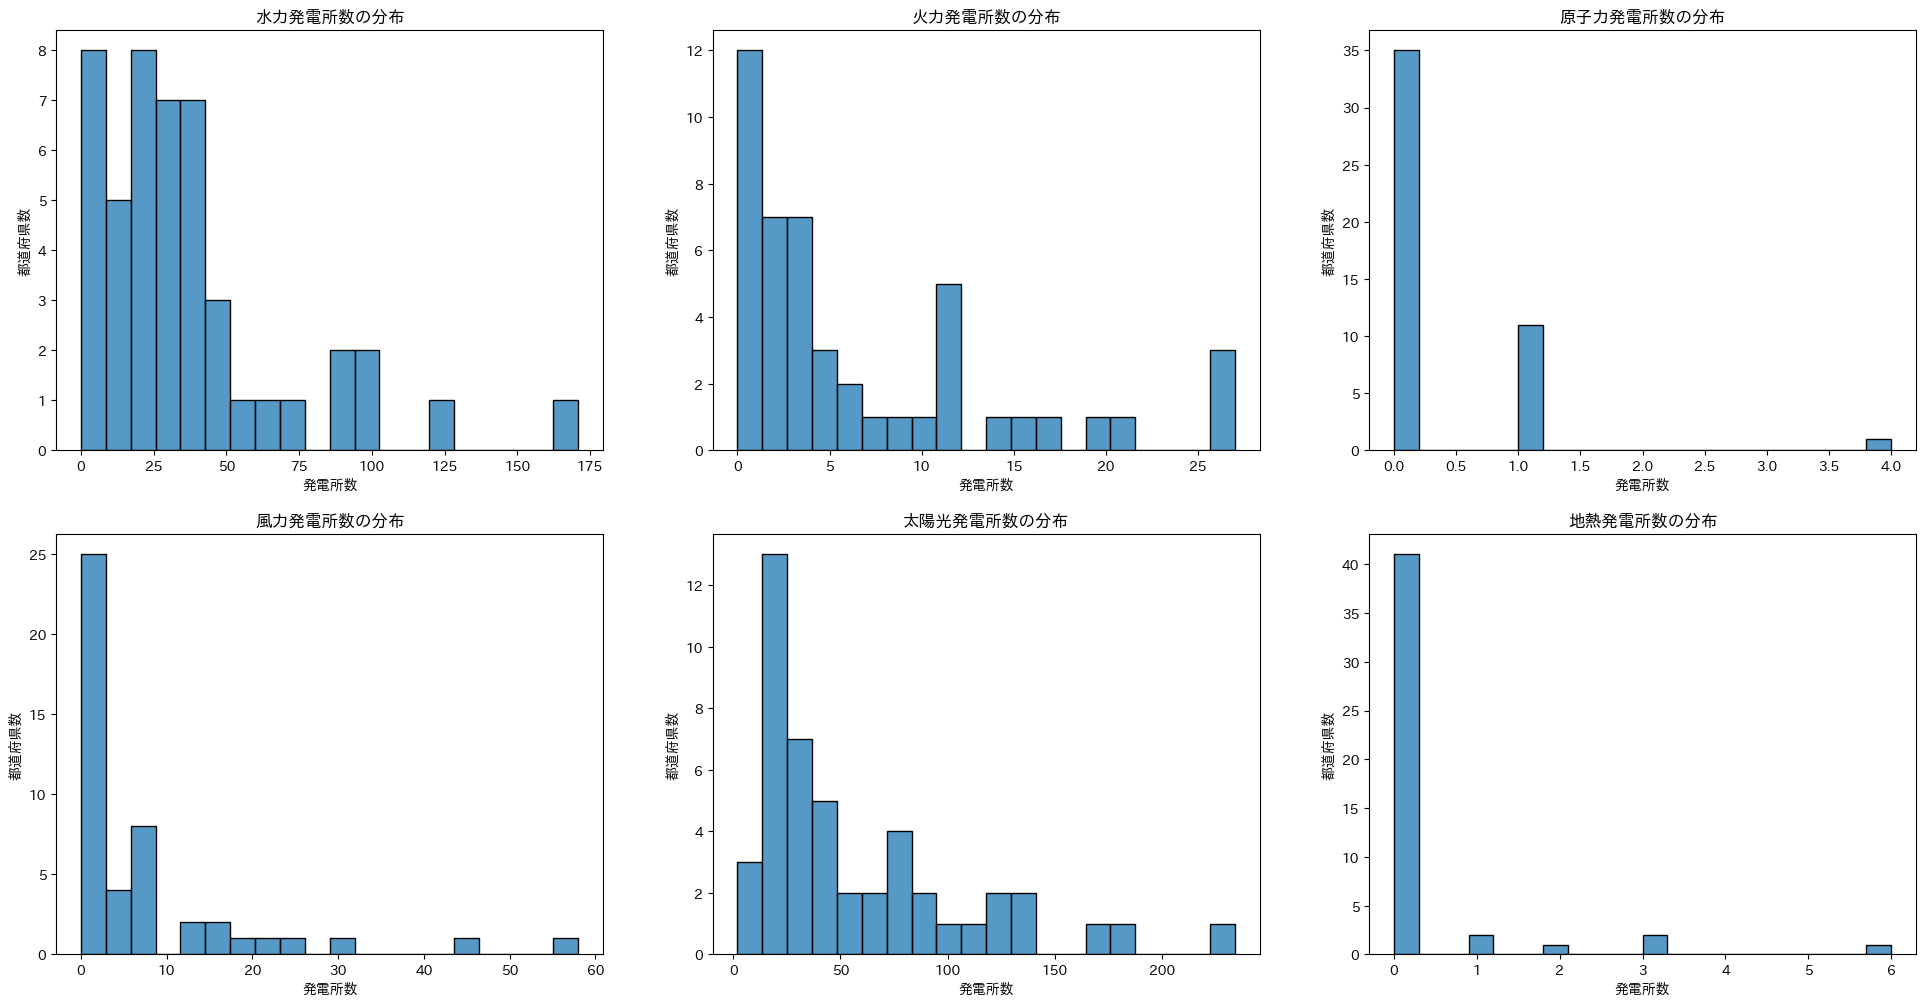

In [27]:

viz_data = datas_v_all.loc[(datas_v_all['年月']=='2021.1') & (datas_v_all['項目']=='発電所数')]

power_list = ['水力','火力','原子力','風力','太陽光','地熱']


fig, axes = plt.subplots(2, 3, figsize=(24, 12))


axes = axes.flatten()

for i, p_name in enumerate(power_list):

  data = viz_data.loc[viz_data['発電種別']==p_name]

  sns.histplot(data['値'], ax=axes[i], bins=20, kde=False)

  axes[i].set_title(f'{p_name}発電所数の分布')

  axes[i].set_xlabel('発電所数')
  axes[i].set_ylabel('都道府県数')

## ex2-4 折れ線グラフを作る
水力発電の発電量の多い都道府県を3件探してください。また、その3件について水力発電所の電力の時系列変化を可視化してください。

<Axes: xlabel='年月', ylabel='値'>

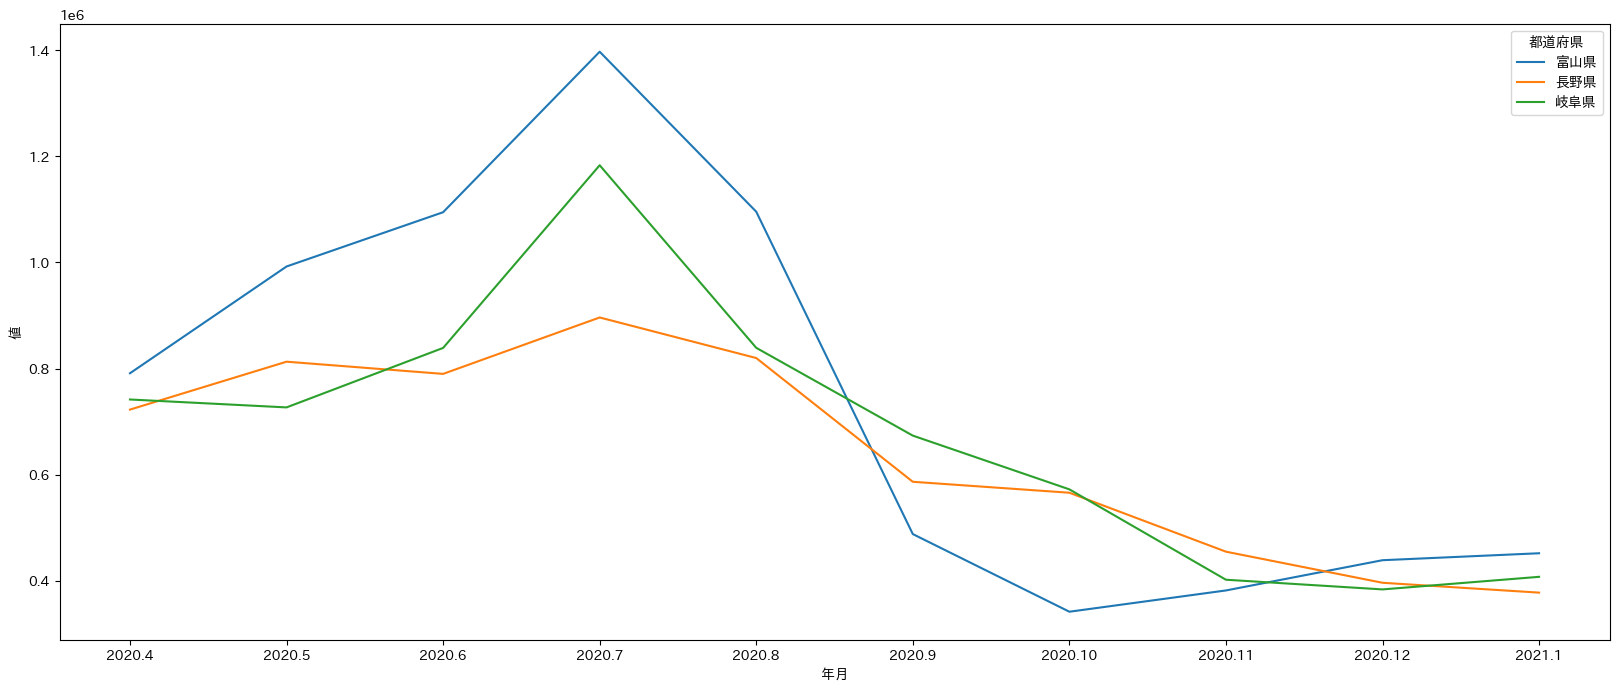

In [28]:

viz_data = datas_v_all.loc[(datas_v_all['発電種別']=='水力') & (datas_v_all['項目']=='電力量')]

top3_prefs = viz_data.groupby('都道府県')['値'].sum().sort_values(ascending=False).head(3).index

viz_data = viz_data.loc[viz_data['都道府県'].isin(top3_prefs)]

plt.figure(figsize=(20, 8))

sns.lineplot(data=viz_data, x='年月', y='値', hue='都道府県')

## ex2-5 ヒートマップを作る
datas_v_all から必要な情報を抽出し、

・水力発電による発電量のヒートマップ（横軸=年月、縦軸＝都道府県）

・太陽光発電による発電量のヒートマップ（横軸=年月、縦軸＝都道府県）

を作成しなさい。

Text(0.5, 1.0, '太陽光発電による発電量のヒートマップ')

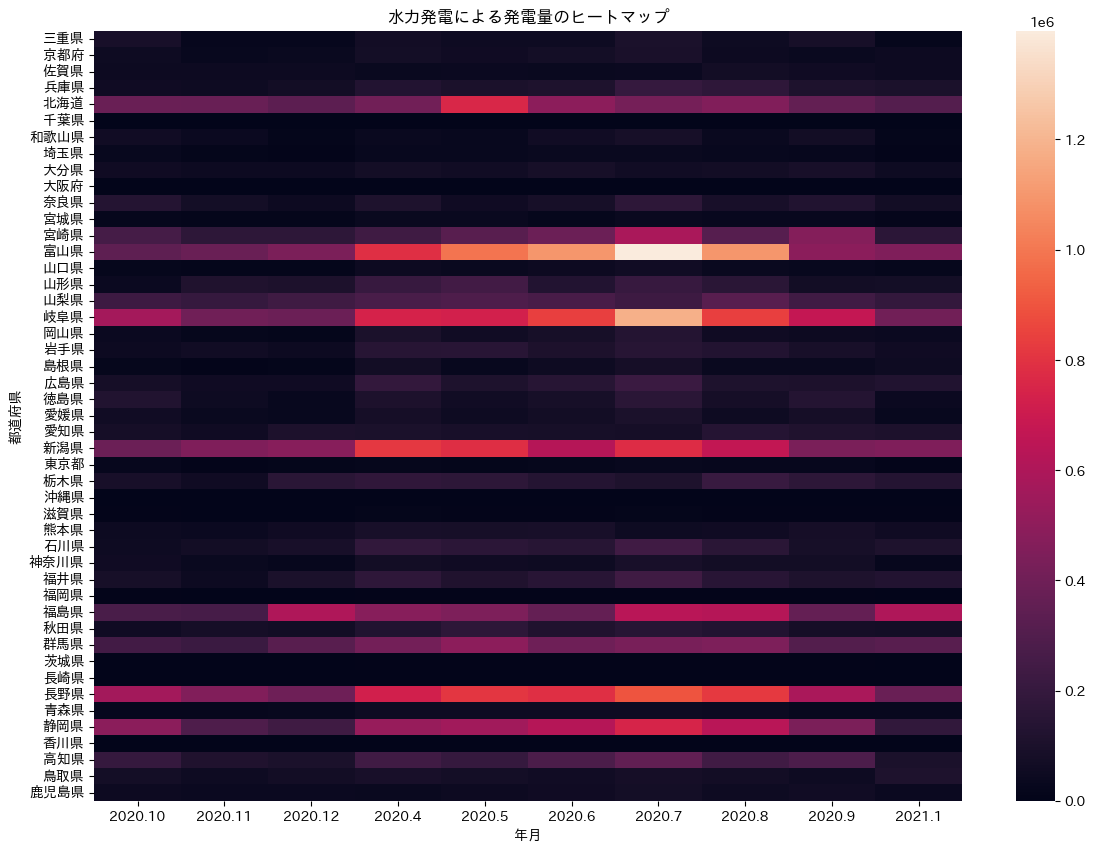

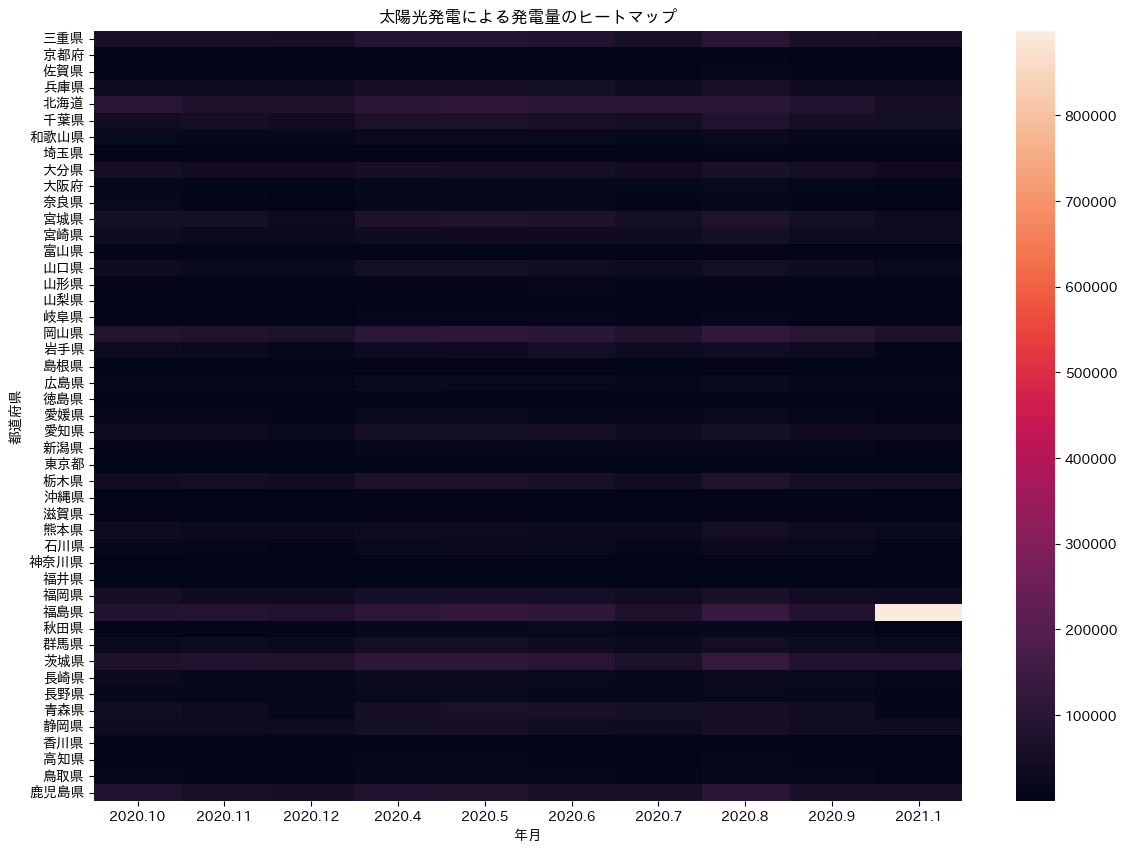

In [29]:

datas_v_all['値'] = pd.to_numeric(datas_v_all['値'], errors='coerce')


viz_data_hydro = datas_v_all.loc[(datas_v_all['発電種別']=='水力') & (datas_v_all['項目']=='電力量')]

viz_data_hydro_pivot = pd.pivot_table(data=viz_data_hydro, values='値', columns='年月', index='都道府県')

plt.figure(figsize=(14, 10))

sns.heatmap(viz_data_hydro_pivot, cmap='rocket')
plt.title('水力発電による発電量のヒートマップ')


viz_data_solar = datas_v_all.loc[(datas_v_all['発電種別']=='太陽光') & (datas_v_all['項目']=='電力量')]

viz_data_solar_pivot = pd.pivot_table(data=viz_data_solar, values='値', columns='年月', index='都道府県')

plt.figure(figsize=(14, 10))

sns.heatmap(viz_data_solar_pivot, cmap='rocket')
plt.title('太陽光発電による発電量のヒートマップ')

## ex2-6 散布図を作る
散布図は横持データ（）から作る方がたやすいです。viz_data を使って、

・[1風力発電所数]と[2風力発電の最大出力計]　の関係

・[3太陽光発電所数]と[4太陽光発電所の最大出力計]　の関係（ヒストグラム付き）

・1,2,3,4それぞれの関係

を表すグラフを作成せよ。

/tmp/ipython-input-3472151124.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viz_data['col_name'] = viz_data['発電所種別'] + '_' + viz_data['発電種別'] + '_' + viz_data['項目']


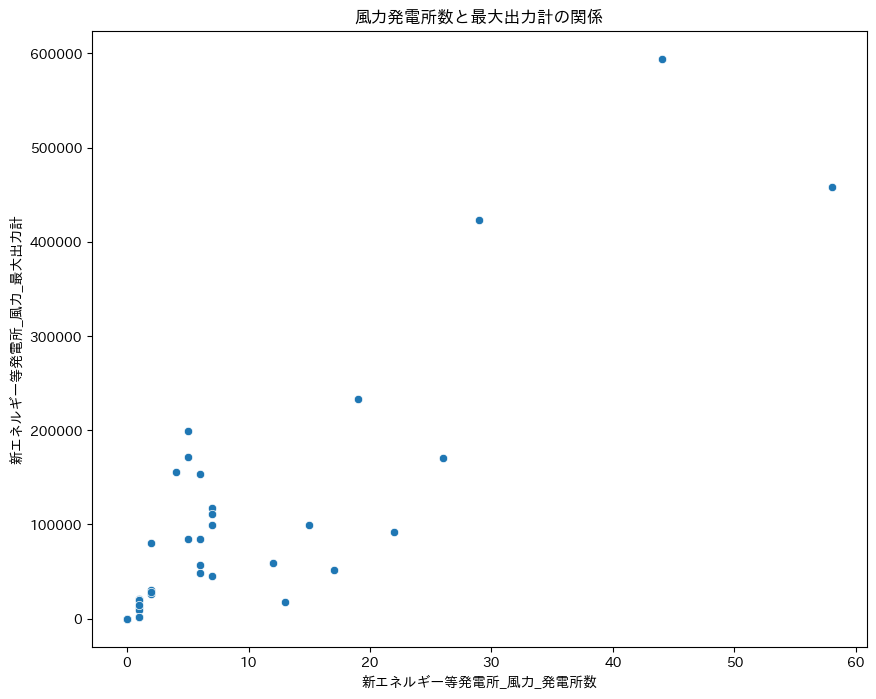

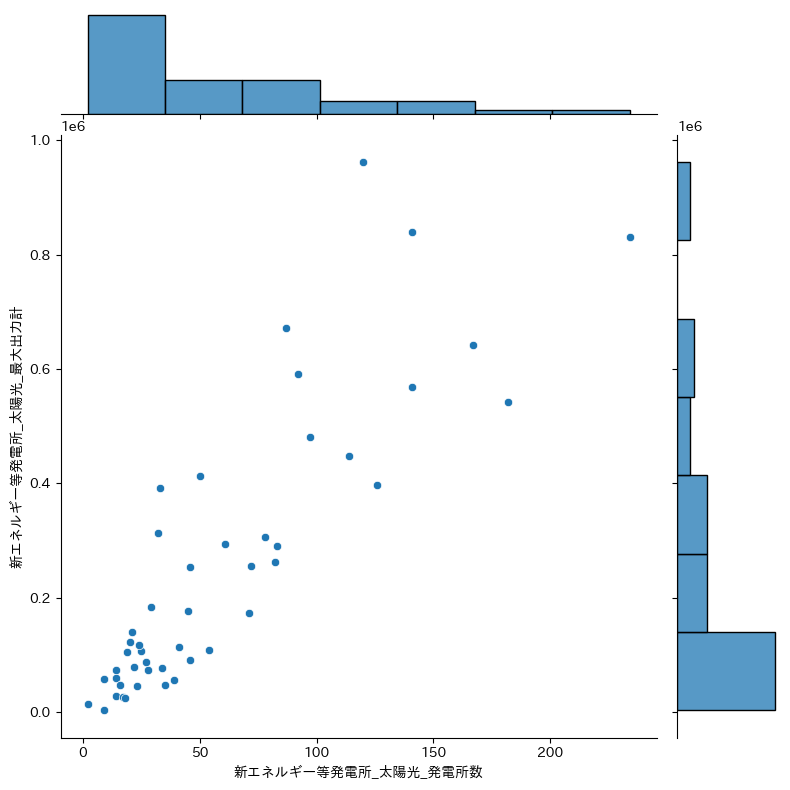

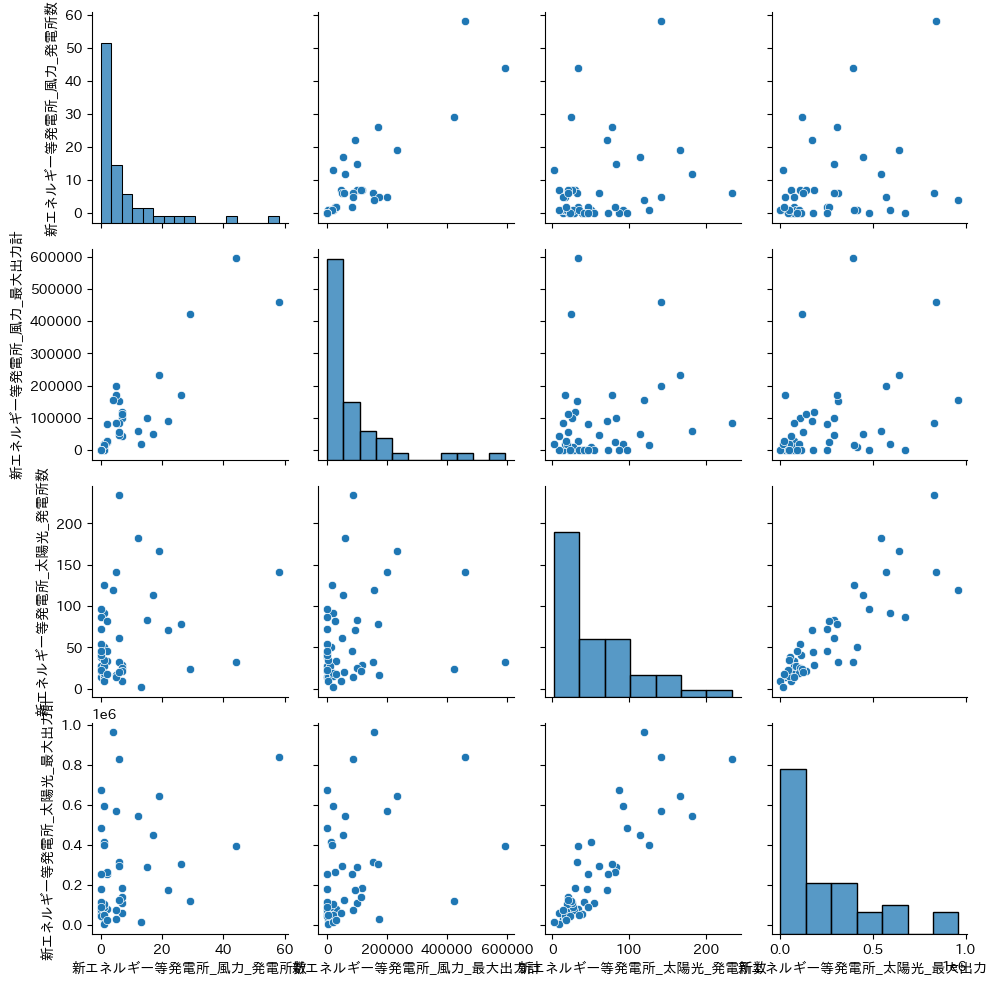

In [30]:

viz_data = datas_v_all.loc[(datas_v_all['年月']=='2021.1') &
                           (datas_v_all['項目'].isin(['発電所数', '最大出力計'])) &
                           (datas_v_all['発電種別'].isin(['風力', '太陽光']))]

viz_data['col_name'] = viz_data['発電所種別'] + '_' + viz_data['発電種別'] + '_' + viz_data['項目']

viz_data_pivot = pd.pivot_table(viz_data, index='都道府県', columns='col_name', values='値')

plt.figure(figsize=(10, 8))
sns.scatterplot(data=viz_data_pivot, x='新エネルギー等発電所_風力_発電所数', y='新エネルギー等発電所_風力_最大出力計')
plt.title('風力発電所数と最大出力計の関係')


sns.jointplot(data=viz_data_pivot, x='新エネルギー等発電所_太陽光_発電所数', y='新エネルギー等発電所_太陽光_最大出力計', height=8)


plot_cols = [
    '新エネルギー等発電所_風力_発電所数',
    '新エネルギー等発電所_風力_最大出力計',
    '新エネルギー等発電所_太陽光_発電所数',
    '新エネルギー等発電所_太陽光_最大出力計'
]
sns.pairplot(viz_data_pivot[plot_cols])

課題は以上です。作成したファイルを google classroom に提出してください。